In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:/Data Science/Python for DS/UDEMY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/BOOT CAMO/original (2)/TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

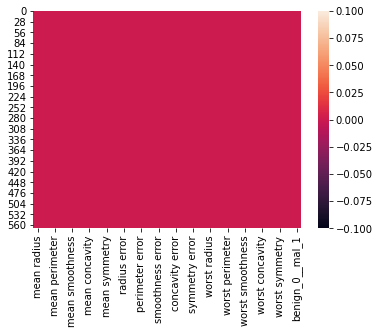

In [8]:
sns.heatmap(df.isnull())

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


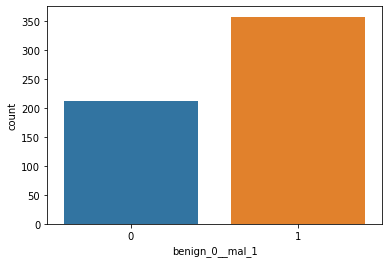

In [11]:
sns.countplot(x = 'benign_0__mal_1', data = df)

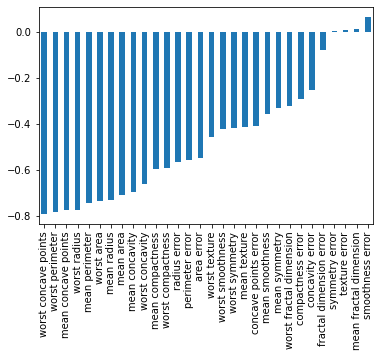

In [15]:
 df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

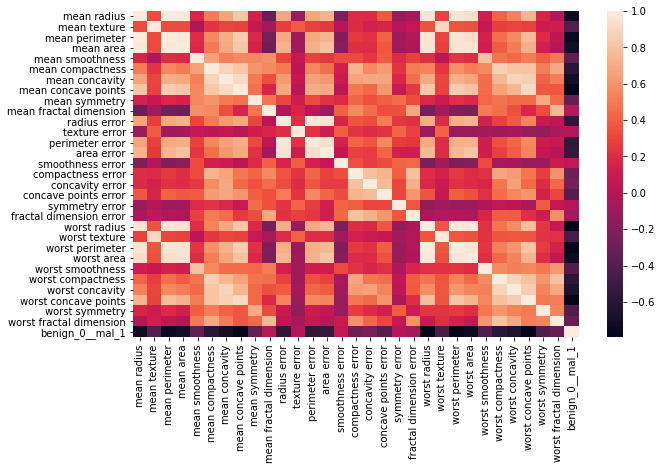

In [17]:
plt.figure(figsize= (10,6))
sns.heatmap(df.corr())

In [18]:
X= df.drop('benign_0__mal_1', axis = 1).values

In [19]:
y = df['benign_0__mal_1'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
X_train= scaler.fit_transform(X_train)

In [72]:
X_test=scaler.fit_transform(X_test)

In [73]:
#build the neuron model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [74]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#binary classification 

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [75]:
model.fit(x = X_train, y = y_train , epochs = 600, validation_data = (X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/600
381/381 [==============================] - 1s 2ms/sample - loss: 0.6825 - val_loss: 0.6616
Epoch 2/600
381/381 [==============================] - 0s 150us/sample - loss: 0.6299 - val_loss: 0.6175
Epoch 3/600
381/381 [==============================] - 0s 178us/sample - loss: 0.5894 - val_loss: 0.5666
Epoch 4/600
381/381 [==============================] - 0s 155us/sample - loss: 0.5454 - val_loss: 0.5113
Epoch 5/600
381/381 [==============================] - 0s 170us/sample - loss: 0.4981 - val_loss: 0.4606
Epoch 6/600
381/381 [==============================] - 0s 144us/sample - loss: 0.4534 - val_loss: 0.4119
Epoch 7/600
381/381 [==============================] - 0s 134us/sample - loss: 0.4111 - val_loss: 0.3655
Epoch 8/600
381/381 [==============================] - 0s 136us/sample - loss: 0.3719 - val_loss: 0.3272
Epoch 9/600
381/381 [==============================] - 0s 131us/sample - loss: 0.3391 - val_loss: 0.2951
Epoch 10/60

Epoch 78/600
381/381 [==============================] - 0s 165us/sample - loss: 0.0589 - val_loss: 0.1816
Epoch 79/600
381/381 [==============================] - 0s 157us/sample - loss: 0.0589 - val_loss: 0.2255
Epoch 80/600
381/381 [==============================] - 0s 155us/sample - loss: 0.0575 - val_loss: 0.1793
Epoch 81/600
381/381 [==============================] - 0s 157us/sample - loss: 0.0555 - val_loss: 0.2648
Epoch 82/600
381/381 [==============================] - 0s 134us/sample - loss: 0.0587 - val_loss: 0.1961
Epoch 83/600
381/381 [==============================] - 0s 134us/sample - loss: 0.0559 - val_loss: 0.2655
Epoch 84/600
381/381 [==============================] - 0s 142us/sample - loss: 0.0547 - val_loss: 0.1875
Epoch 85/600
381/381 [==============================] - 0s 115us/sample - loss: 0.0589 - val_loss: 0.2480
Epoch 86/600
381/381 [==============================] - 0s 115us/sample - loss: 0.0549 - val_loss: 0.2350
Epoch 87/600
381/381 [========================

Epoch 155/600
381/381 [==============================] - 0s 152us/sample - loss: 0.0421 - val_loss: 0.4491
Epoch 156/600
381/381 [==============================] - 0s 142us/sample - loss: 0.0407 - val_loss: 0.4982
Epoch 157/600
381/381 [==============================] - 0s 134us/sample - loss: 0.0396 - val_loss: 0.4671
Epoch 158/600
381/381 [==============================] - 0s 126us/sample - loss: 0.0405 - val_loss: 0.4427
Epoch 159/600
381/381 [==============================] - 0s 142us/sample - loss: 0.0398 - val_loss: 0.5239
Epoch 160/600
381/381 [==============================] - 0s 157us/sample - loss: 0.0393 - val_loss: 0.4175
Epoch 161/600
381/381 [==============================] - 0s 147us/sample - loss: 0.0475 - val_loss: 0.5003
Epoch 162/600
381/381 [==============================] - 0s 148us/sample - loss: 0.0446 - val_loss: 0.4538
Epoch 163/600
381/381 [==============================] - 0s 165us/sample - loss: 0.0393 - val_loss: 0.6106
Epoch 164/600
381/381 [==============

381/381 [==============================] - 0s 134us/sample - loss: 0.0275 - val_loss: 0.7790
Epoch 232/600
381/381 [==============================] - 0s 118us/sample - loss: 0.0289 - val_loss: 0.8990
Epoch 233/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0277 - val_loss: 0.7651
Epoch 234/600
381/381 [==============================] - 0s 126us/sample - loss: 0.0279 - val_loss: 0.8180
Epoch 235/600
381/381 [==============================] - 0s 115us/sample - loss: 0.0265 - val_loss: 0.9236
Epoch 236/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0264 - val_loss: 0.8510
Epoch 237/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0264 - val_loss: 0.8950
Epoch 238/600
381/381 [==============================] - 0s 122us/sample - loss: 0.0277 - val_loss: 0.7993
Epoch 239/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0261 - val_loss: 1.0004
Epoch 240/600
381/381 [============================

381/381 [==============================] - 0s 118us/sample - loss: 0.0159 - val_loss: 1.1581
Epoch 308/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0165 - val_loss: 1.3654
Epoch 309/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0155 - val_loss: 1.2825
Epoch 310/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0168 - val_loss: 1.4154
Epoch 311/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0175 - val_loss: 1.2482
Epoch 312/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0162 - val_loss: 1.2740
Epoch 313/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0163 - val_loss: 1.3929
Epoch 314/600
381/381 [==============================] - 0s 118us/sample - loss: 0.0163 - val_loss: 1.3052
Epoch 315/600
381/381 [==============================] - 0s 129us/sample - loss: 0.0147 - val_loss: 1.3110
Epoch 316/600
381/381 [============================

381/381 [==============================] - 0s 139us/sample - loss: 0.0095 - val_loss: 1.6421
Epoch 384/600
381/381 [==============================] - 0s 160us/sample - loss: 0.0090 - val_loss: 1.5471
Epoch 385/600
381/381 [==============================] - 0s 126us/sample - loss: 0.0094 - val_loss: 1.6901
Epoch 386/600
381/381 [==============================] - 0s 115us/sample - loss: 0.0109 - val_loss: 1.6296
Epoch 387/600
381/381 [==============================] - 0s 121us/sample - loss: 0.0130 - val_loss: 1.7102
Epoch 388/600
381/381 [==============================] - 0s 118us/sample - loss: 0.0113 - val_loss: 1.5651
Epoch 389/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0088 - val_loss: 1.7258
Epoch 390/600
381/381 [==============================] - 0s 118us/sample - loss: 0.0103 - val_loss: 1.5038
Epoch 391/600
381/381 [==============================] - 0s 129us/sample - loss: 0.0103 - val_loss: 1.6701
Epoch 392/600
381/381 [============================

381/381 [==============================] - 0s 207us/sample - loss: 0.0054 - val_loss: 1.9893
Epoch 460/600
381/381 [==============================] - 0s 147us/sample - loss: 0.0062 - val_loss: 1.7973
Epoch 461/600
381/381 [==============================] - 0s 139us/sample - loss: 0.0059 - val_loss: 2.0121
Epoch 462/600
381/381 [==============================] - 0s 147us/sample - loss: 0.0051 - val_loss: 1.9478
Epoch 463/600
381/381 [==============================] - 0s 139us/sample - loss: 0.0050 - val_loss: 2.0150
Epoch 464/600
381/381 [==============================] - 0s 157us/sample - loss: 0.0050 - val_loss: 1.8660
Epoch 465/600
381/381 [==============================] - 0s 131us/sample - loss: 0.0050 - val_loss: 1.9863
Epoch 466/600
381/381 [==============================] - 0s 144us/sample - loss: 0.0050 - val_loss: 1.9784
Epoch 467/600
381/381 [==============================] - 0s 134us/sample - loss: 0.0058 - val_loss: 1.9429
Epoch 468/600
381/381 [============================

381/381 [==============================] - 0s 123us/sample - loss: 0.0031 - val_loss: 2.0997
Epoch 536/600
381/381 [==============================] - 0s 123us/sample - loss: 0.0028 - val_loss: 2.1993
Epoch 537/600
381/381 [==============================] - 0s 131us/sample - loss: 0.0027 - val_loss: 2.0586
Epoch 538/600
381/381 [==============================] - 0s 113us/sample - loss: 0.0028 - val_loss: 2.1388
Epoch 539/600
381/381 [==============================] - 0s 118us/sample - loss: 0.0026 - val_loss: 2.1426
Epoch 540/600
381/381 [==============================] - 0s 129us/sample - loss: 0.0027 - val_loss: 2.1433
Epoch 541/600
381/381 [==============================] - 0s 129us/sample - loss: 0.0027 - val_loss: 2.1686
Epoch 542/600
381/381 [==============================] - 0s 126us/sample - loss: 0.0026 - val_loss: 2.1599
Epoch 543/600
381/381 [==============================] - 0s 129us/sample - loss: 0.0028 - val_loss: 2.0602
Epoch 544/600
381/381 [============================

In [76]:
losses = pd.DataFrame(model.history.history)

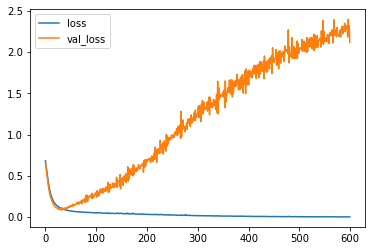

In [77]:
losses.plot()

as per above grath we are seeing it is overfitting hence we will use early stopping 

In [78]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#binary classification 

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose = 1,patience = 25)

In [81]:
model.fit(x = X_train, y = y_train , epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 381 samples, validate on 188 samples
Epoch 1/600
381/381 [==============================] - 1s 3ms/sample - loss: 0.6762 - val_loss: 0.6537
Epoch 2/600
381/381 [==============================] - 0s 157us/sample - loss: 0.6481 - val_loss: 0.6204
Epoch 3/600
381/381 [==============================] - 0s 170us/sample - loss: 0.6222 - val_loss: 0.5882
Epoch 4/600
381/381 [==============================] - 0s 176us/sample - loss: 0.5884 - val_loss: 0.5591
Epoch 5/600
381/381 [==============================] - 0s 163us/sample - loss: 0.5559 - val_loss: 0.5238
Epoch 6/600
381/381 [==============================] - 0s 142us/sample - loss: 0.5213 - val_loss: 0.4862
Epoch 7/600
381/381 [==============================] - 0s 152us/sample - loss: 0.4855 - val_loss: 0.4496
Epoch 8/600
381/381 [==============================] - 0s 155us/sample - loss: 0.4504 - val_loss: 0.4132
Epoch 9/600
381/381 [==============================] - 0s 178us/sample - loss: 0.4162 - val_loss: 0.3801
Epoch 10/60

In [82]:
model_loss = pd.DataFrame(model.history.history)

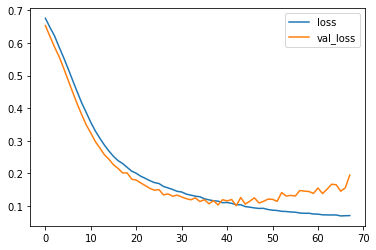

In [83]:
model_loss.plot()

In [84]:
model_loss.head()


,loss,val_loss
0,0.676234,0.653681
1,0.648063,0.620379
2,0.622241,0.588155
3,0.588353,0.559058
4,0.555944,0.523817


In [85]:
from tensorflow.keras.layers import Dropout

In [86]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#binary classification 

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [87]:
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose = 1,patience = 25)

In [88]:
model.fit(x = X_train, y = y_train , epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 381 samples, validate on 188 samples
Epoch 1/600
381/381 [==============================] - 1s 3ms/sample - loss: 0.7164 - val_loss: 0.6848
Epoch 2/600
381/381 [==============================] - 0s 186us/sample - loss: 0.7055 - val_loss: 0.6546
Epoch 3/600
381/381 [==============================] - 0s 168us/sample - loss: 0.6608 - val_loss: 0.6327
Epoch 4/600
381/381 [==============================] - 0s 163us/sample - loss: 0.6491 - val_loss: 0.6097
Epoch 5/600
381/381 [==============================] - 0s 165us/sample - loss: 0.6217 - val_loss: 0.5900
Epoch 6/600
381/381 [==============================] - 0s 152us/sample - loss: 0.6067 - val_loss: 0.5670
Epoch 7/600
381/381 [==============================] - 0s 150us/sample - loss: 0.5981 - val_loss: 0.5407
Epoch 8/600
381/381 [==============================] - 0s 202us/sample - loss: 0.5622 - val_loss: 0.5170
Epoch 9/600
381/381 [==============================] - 0s 165us/sample - loss: 0.5533 - val_loss: 0.4862
Epoch 10/60

Epoch 78/600
381/381 [==============================] - 0s 157us/sample - loss: 0.1322 - val_loss: 0.1234
Epoch 79/600
381/381 [==============================] - 0s 157us/sample - loss: 0.1299 - val_loss: 0.0956
Epoch 80/600
381/381 [==============================] - 0s 155us/sample - loss: 0.1379 - val_loss: 0.1120
Epoch 81/600
381/381 [==============================] - 0s 136us/sample - loss: 0.1630 - val_loss: 0.1200
Epoch 82/600
381/381 [==============================] - 0s 142us/sample - loss: 0.1405 - val_loss: 0.1227
Epoch 83/600
381/381 [==============================] - 0s 145us/sample - loss: 0.1326 - val_loss: 0.1179
Epoch 84/600
381/381 [==============================] - 0s 142us/sample - loss: 0.1543 - val_loss: 0.1194
Epoch 85/600
381/381 [==============================] - 0s 136us/sample - loss: 0.1483 - val_loss: 0.1205
Epoch 86/600
381/381 [==============================] - 0s 142us/sample - loss: 0.1394 - val_loss: 0.1184
Epoch 87/600
381/381 [========================

In [89]:
model_loss = pd.DataFrame(model.history.history)

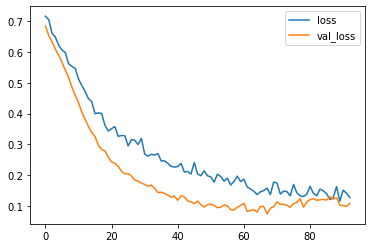

In [90]:
model_loss.plot()

In [92]:
predictions=model.predict_classes(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        67
           1       0.99      0.93      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.96      0.95      0.95       188



In [95]:
print(confusion_matrix(y_test, predictions))

[[ 66   1]
 [  8 113]]
